# Задача 1. Разведочный анализ

- [✓] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [✓] Считать данные и вывести их основные характеристики, описание признаков.
- [✓] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [✓] (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [✓] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [✓] (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [✓] (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [603]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Выбранный датасет

Датасет содержит физиологические параметры особей поссумов, пойманных в Австралии.

Признаки:
- `case` — номер особи
- `site` — номер места, в котором особь была поймана
- `Pop` — популяция (либо "Vic" — штат Виктория, либо "other" — штаты Новый Южный Уэльс и Квинсленд)
- `sex` — пол
- `age` — возраст, годы
- `hdlngth` — длина головы, мм
- `skullw` — ширина черепа, мм
- `totlngth` — полная длина особи, см
- `taill` — длина хвоста, см
- `footlgth` — длина лапки, мм
- `earconch` — длина ушной раковины, мм
- `eye` — расстояние между медиальным и латеральным углами правого глаза, мм
- `chest` — обхват грудной клетки, см
- `belly` — обхват живота, см

Предлагается решить задачу регрессии, определив возраст поссума.

In [604]:
df = pd.read_csv("datasets/possum.csv")

Сразу сделаем наименования признаков более единообразными.

In [605]:
df.rename(columns={"Pop": "population", "hdlngth": "head_length", "skullw": "skull_width", "totlngth": "total_length", "taill": "tail_length", "footlgth": "foot_length", "earconch": "ear_length", "eye": "eye_length", "chest": "chest_girth", "belly": "belly_girth"}, inplace=True)
df.head()

,case,site,population,sex,age,head_length,skull_width,total_length,tail_length,foot_length,ear_length,eye_length,chest_girth,belly_girth
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [606]:
df.describe()

,case,site,age,head_length,skull_width,total_length,tail_length,foot_length,ear_length,eye_length,chest_girth,belly_girth
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


## Feature Engineering

Некоторые признаки, означающие длину, указаны в сантиметрах, а некоторые — в миллиметрах. Чтобы не путаться, переведём их все в миллиметры. 

In [607]:
df["total_length"] *= 10
df["tail_length"] *= 10
df["chest_girth"] *= 10
df["belly_girth"] *= 10

Удалим колонку `case`, так как она попросту дублирует индекс записей.

In [608]:
df.drop(columns=["case"], inplace=True)

В качестве подготовки к обучению сделаем категориальные признаки числовыми:
- Пол: 1 — мужской, 0 — женский
- Популяция: 1 — викторианская, 0 — иная

In [609]:
df["sex"].replace(["f", "m"], [0, 1], inplace=True)
df["population"].replace(["other", "Vic"], [0, 1], inplace=True)

## Data Cleaning

Посмотрим, какие значения отсутствуют в датасете:

In [610]:
df.isnull().sum()

site            0
population      0
sex             0
age             2
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     1
ear_length      0
eye_length      0
chest_girth     0
belly_girth     0
dtype: int64

Отсутствует два значения возраста. Так как это целевой признак и утерянный объём не столь велик относительно объёма датасета, просто удалим соответствующие записи.

In [611]:
df.dropna(subset=["age"], inplace=True)

Также отсутствует одно значение длины лапки. Зависимость длины лапки от остальных признаков не очевидна, и как видно на графике ниже, данный признак не имеет нормального распределения, поэтому замена отсутствующего значение некоторой оценкой матожидания не выглядит однозначно хорошим решением. Итого, так как отсутствует всего одно значение, соответствующую ему запись также удалим.

<Axes: xlabel='foot_length', ylabel='Count'>

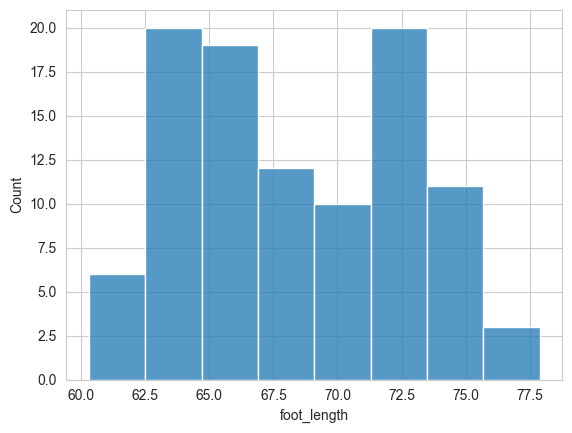

In [612]:
sns.histplot(df["foot_length"])

In [613]:
df.dropna(subset=["foot_length"], inplace=True)

## Анализ признаков

### Популяция и место поимки

Для начала заметим, что место поимки поссума однозначно определяет его популяцию (и наоборот), что, в целом, ожидаемо, так как оба признака — территориальные.

In [614]:
victorian_sites = df[df.population == 1]["site"].unique()
other_sites = df[df.population == 0]["site"].unique()
print("Sites of victorian population:", victorian_sites)
print("Sites of other populations:", other_sites)

Sites of victorian population: [1 2]
Sites of other populations: [3 4 5 6 7]


В поиске целевого признака такое разбиение мест поимки на популяции не помогает: на графике ниже видно, что популяции имеют больший разброс по возрасту, чем конкретные места поимки.

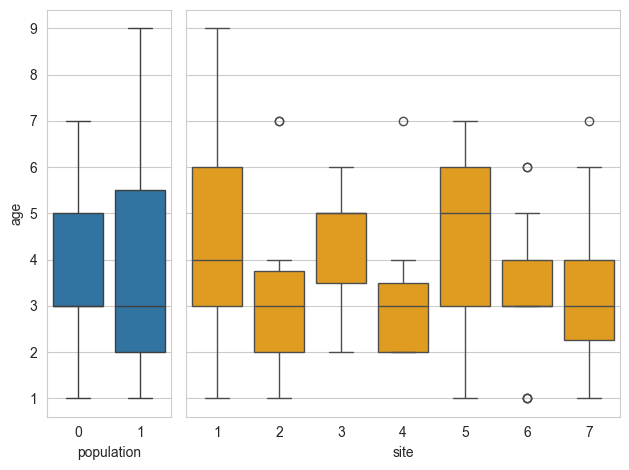

In [615]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={"width_ratios": [1, 3.5]})
sns.boxplot(df, x="population", y="age", ax=ax1)
sns.boxplot(df, x="site", y="age", ax=ax2, color="orange")
fig.tight_layout()

Поэтому избавимся от деления на популяции, оставив лишь деление на конкретные места поимки.

In [616]:
df.drop(columns=["population"], inplace=True)

### Влияние пола на возраст

Изучим, можно ли по полу поссума судить о его возрасте?

<Axes: ylabel='age'>

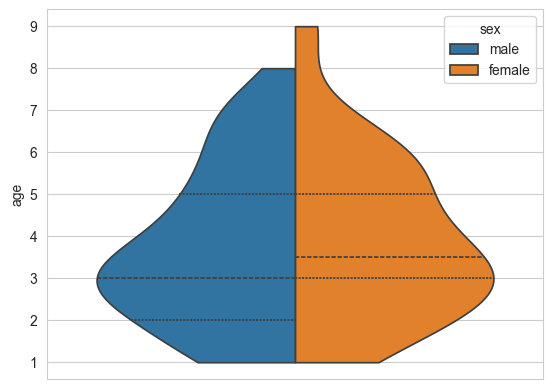

In [617]:
df_str_sex = df
df_str_sex["sex"].replace([1, 0], ["male", "female"], inplace=True)
sns.violinplot(df_str_sex, y="age", hue="sex", split=True, cut=0, inner="quart")

Как видно, женские особи имеют больший средний и максимальный возрасты. Следовательно, пол поссума действительно может помочь при определении его возраста.

## Зависимости между всеми количественными признаками

Для оценки зависимости между количественными признаками построим матрицу корреляции.

<Axes: >

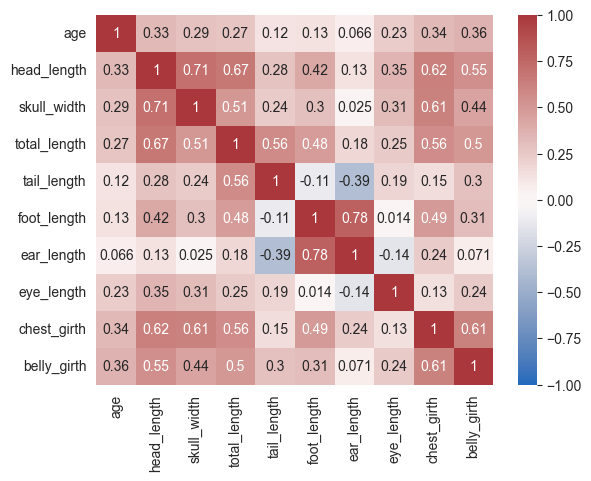

In [618]:
df_quantitative = df.drop(columns=["site", "sex"])
sns.heatmap(df_quantitative.corr(), vmin=-1, vmax=1, annot=True, cmap="vlag")

К сожалению, не удаётся явно выделить признаки, сильно коррелирующие с целевым (возрастом поссума).

Также заметна существенная (и неожиданная) корреляция между длинами лапки и ушной раковины. Также на графике ниже видно, что эти признаки сильно зависят от места поимки поссума.

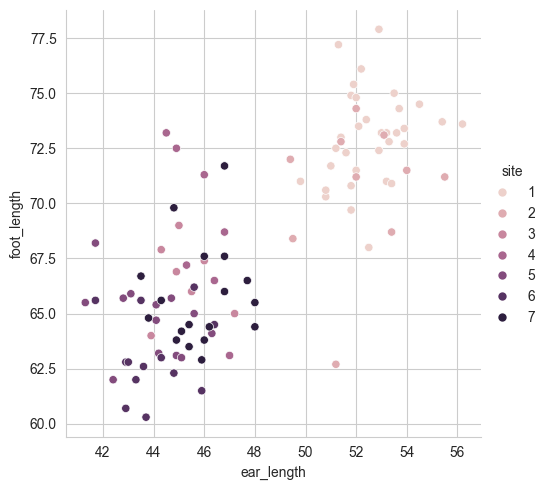

In [619]:
sns.relplot(df, x="ear_length", y="foot_length", hue="site")

При построении модели стоит пронаблюдать, будет ли удаление одного из данных признаков (длины лапки или длины ушной раковины) способствовать улучшению результатов регрессии.